# 効果検証および因果推論にむけて

### Q1. 独立2群の平均の差の検定（1/2）
ある研究者Xは効果的な英語教育方法を研究開発しており，この度，その効果を検証することになったとする．研究者Xは自身が所属する大学の学生をランダムに40名を選び，うち20名（以下**treatment群**と呼ぶ）には開発した教育方法を，残り20名（以下**control群**と呼ぶ）には従来の教育方法を用いて英語の授業を行った．開発した教育方法の効果を検証するために，被験者である学生には，授業前後に英語能力テストを受験してもらい，スコアの改善度を調査した．

``data/causal-analysis``ディレクトリの``small-sample.tsv``ファイルは，treatment群およびcontrol群の英語テストの改善度合い（score）が収められている．``small-sample.tsv``ファイルを用いて，2群の母平均に差があるかを統計的検定によって確認せよ．なお，treatment群とcontrol群の点数は正規分布に従い，その分散は等しいと仮定してよい．

In [1]:
import pandas as pd
from statsmodels.stats.weightstats import ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_style('ticks')
%matplotlib inline

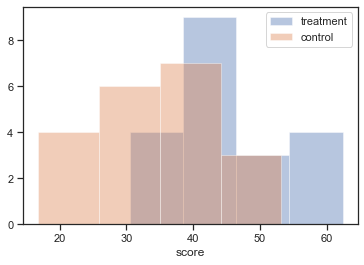

In [2]:
small_df = pd.read_table('../data/causal-analysis/small-sampleX.tsv', sep='\t')

fig = sns.distplot(small_df[small_df.group == "treatment"].score, kde=False)
sns.distplot(small_df[small_df.group == "control"].score, kde=False)
fig.legend(['treatment', 'control'])

In [3]:
# t検定
t, p, dof = ttest_ind(small_df[small_df.group == "treatment"].score, 
                      small_df[small_df.group == "control"].score)

print("p-value on t-test = ", p)

p-value on t-test =  0.0008184104209964199


### Q2. 独立2群の平均の差の検定（2/2）：サンプルサイズとp値
Q1で検証した英語教育方法について，より本格的に検証したいと考えた研究者Xは，全国の大学から学生をランダムに選び，treatment群に5000人，control群に5000人を割り当てて，Q1と同様のことを行った．

``data/causal-analysis``ディレクトリの``large-sampleX.tsv``ファイルは，treatment群およびcontrol群の試験の点数（score）が収められている．``large-sampleX.tsv``ファイルを用いて，2群の母平均に差があるかを統計的検定によって確認し，研究者Xが開発した教育方法に効果があるかを考察せよ．なお，treatment群とcontrol群の点数は正規分布に従い，その分散は等しいと仮定してよい．

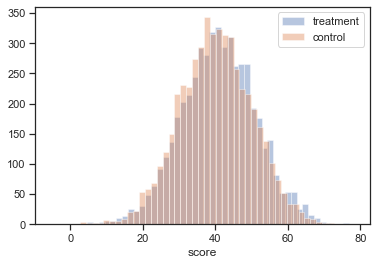

In [4]:
largeX_df = pd.read_table('../data/causal-analysis/large-sampleX.tsv', sep='\t')

fig = sns.distplot(largeX_df[largeX_df.group == "treatment"].score, kde=False)
sns.distplot(largeX_df[largeX_df.group == "control"].score, kde=False)
fig.legend(['treatment', 'control'])

In [5]:
# t検定
t, p, dof = ttest_ind(largeX_df[largeX_df.group == "treatment"].score, 
                      largeX_df[largeX_df.group == "control"].score)

print("p-value on t-test = ", p)

p-value on t-test =  9.864002807145662e-06


### Q3. 効果量
（Q1-2で登場した研究者Xと異なる）別の研究者Yは，研究者Xと異なる英語の教育方法を開発した．研究者Yは，自身が開発した教育方法の効果を検証するために，自身が属する大学の学生をランダムに200人に選び，うち100人に開発した教育方法で，残り100人に従来の教育方法で英語の授業を行った．被験者である学生には，授業前後に英語能力テストを受験してもらい，スコアの改善度を調査した．

``data/causal-analysis``ディレクトリの``large-sampleY.tsv``ファイルは，treatment群およびcontrol群の試験の点数（score）が収められている．``large-sampleY.tsv``ファイルを用いて，研究者Yが開発した教育方法の効果量（Cohen's dスコア）を求めよ．また，Q2のデータに関しても効果量を計算し，研究者Xの教育方法と研究者Yの教育方法のどちらが効果が大きいかを考察せよ．

なお，研究者Yが得たデータにおいて，treatment群とcontrol群の点数は正規分布に従い，その分散は等しいと仮定してよい．

In [6]:
import numpy as np

def cohen_d(X, Y):
    mu_x = np.mean(X)
    mu_y = np.mean(Y)
    var_x = np.var(X)
    var_y = np.var(Y)
    return abs(mu_x - mu_y) / np.sqrt((len(X) * var_x + len(Y) * var_y) / (len(X) + len(Y)))

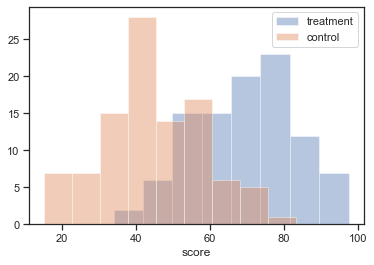

In [7]:
largeY_df = pd.read_table('../data/causal-analysis/large-sampleY.tsv', sep='\t')

fig = sns.distplot(largeY_df[largeY_df.group == "treatment"].score, kde=False)
sns.distplot(largeY_df[largeY_df.group == "control"].score, kde=False)
fig.legend(['treatment', 'control'])

In [8]:
# t検定
t, p, dof = ttest_ind(largeY_df[largeY_df.group == "treatment"].score, 
                      largeY_df[largeY_df.group == "control"].score)

print("p-value on t-test = ", p)

p-value on t-test =  1.6084612381791229e-27


In [9]:
effect_size_X = cohen_d(largeX_df[largeX_df.group == "treatment"].score,
                      largeX_df[largeX_df.group == "control"].score)

print("Effect size = ", effect_size_X)

effect_size_Y = cohen_d(largeY_df[largeY_df.group == "treatment"].score,
                      largeY_df[largeY_df.group == "control"].score)

print("Effect size = ", effect_size_Y)

Effect size =  0.08845693149226899
Effect size =  1.8096876699567674


### Q4. 重回帰分析と抑制変数（1/2）
とあるS大学の教員Yは，S大学の学生の卒業時の成績（GPA）と大学入試の数学の点数，国語の点数との関係を分析している．分析結果をもとに，次年度以降の大学入試で，卒業時に成績の良い学生を選別できるよう，入試の科目（数学および国語）の配点を再検討したいと考えているとする．

``data/causal-analysis``ディレクトリの``gpa.tsv``ファイルには，学生の卒業時の成績（GPA），大学入試の数学の点数（math），および国語の点数（language）が収められている（仮想的なデータ）．GPAと数学，GPAと英語の点数との相関分析を行え．

In [10]:
import pandas as pd
import statsmodels as sm

In [11]:
gpa_df = pd.read_table('../data/causal-analysis/gpa.tsv', sep='\t')
gpa_df.corr()

,gpa,math,language
gpa,1.000000,0.923713,0.491923
math,0.923713,1.000000,0.689538
language,0.491923,0.689538,1.000000


### Q5. 重回帰分析と抑制変数（2/2）
Q4で扱ったデータについて，目的変数をGPA，説明変数を数学および国語の点数とする重回帰分析を行え，重回帰分析の結果およびQ4の結果を踏まえて，S大学の入試において入試試験の数学の得点が同じ受験生がいた場合，国語の点が良い学生を入学させた方がよいか否かをあなたなりに考察せよ．

In [12]:
import statsmodels.formula.api as sm

reg = "gpa ~ math + language"
model = sm.ols(formula=reg, data=gpa_df)

# 回帰分析を実行する
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     406.2
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           7.23e-48
Time:                        17:16:03   Log-Likelihood:                 27.578
No. Observations:                 100   AIC:                            -49.16
Df Residuals:                      97   BIC:                            -41.34
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2132      0.120     10.091      0.000       0.975       1.452
math           0.0359      0.001     24.338      0.000       0.033       0.039
language      -0.0137      0.002     -6.038      0.000      -0.018      -0.009
==============================================================================
Omnibus:                        0.722   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.697   Jarque-Bera (JB):                0.782
Skew:                           0.019   Prob(JB):                        0.677
Kurtosis:                       2.569   Cond. No.                         611.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

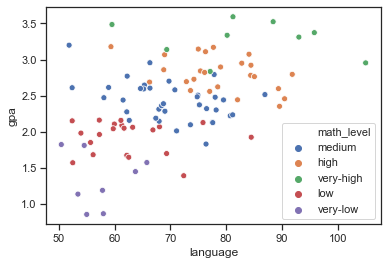

In [13]:
gpa_df['math_level'] = pd.cut(gpa_df.math, 5,
                              labels=['very-low', 'low', 'medium', 'high', 'very-high'])
sns.scatterplot(data=gpa_df, x='language', y='gpa', hue='math_level')

### Q6. バックドア（1/2）
[文部科学省](https://www.mext.go.jp/kids/find/kyoiku/mext_0020.html)や[農林水産省](https://www.maff.go.jp/j/syokuiku/wpaper/h30_minna/html/part3.html)や公表しているように，朝食摂取と学力には関係があるとされている．

``data/causal-analysis/backdoor1.tsv``ファイルには，ある高校の学生50名分の1週間の朝食摂取率（``breakfast``）と数学の平均正解率（``math``），および生活習慣の質スコア（``life_style``）が収められている（データはフィクションである）．

数学の平均正解率を目的変数，朝食摂取率を説明変数とした回帰分析を行え．さらに，説明変数に生活習慣の質スコアを加えた重回帰分析を行い，先の回帰分析との結果を比較し，生活習慣の質スコアを変数に加えることの影響について考察せよ．

In [14]:
backdoor1_df = pd.read_csv("../data/causal-analysis/backdoor1.tsv", sep='\t')

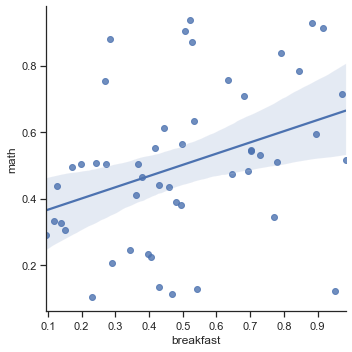

In [15]:
sns.lmplot(x="breakfast", y="math", data=backdoor1_df, ci=95)

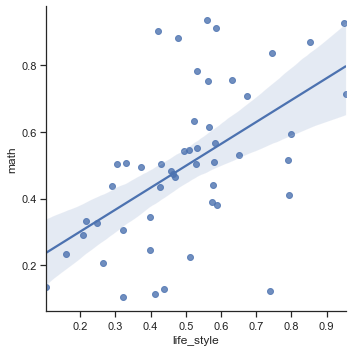

In [16]:
sns.lmplot(x="life_style", y="math", data=backdoor1_df, ci=95)

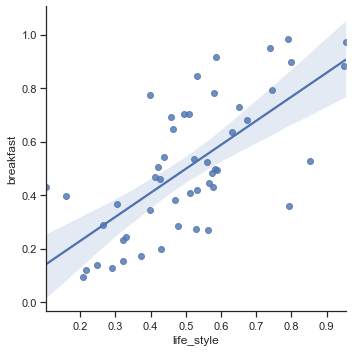

In [17]:
sns.lmplot(x="life_style", y="breakfast", data=backdoor1_df, ci=95)

In [18]:
reg = "math ~ breakfast"
model = sm.ols(formula=reg, data=backdoor1_df)

# 回帰分析を実行する
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   math   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     7.237
Date:                Wed, 10 Jun 2020   Prob (F-statistic):            0.00980
Time:                        17:16:04   Log-Likelihood:                 5.7078
No. Observations:                  50   AIC:                            -7.416
Df Residuals:                      48   BIC:                            -3.592
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3331      0.070      4.734      0.000       0.192       0.475
breakfast      0.3370      0.125      2.690      0.010       0.085       0.589
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.986   Jarque-Bera (JB):                0.045
Skew:                          -0.001   Prob(JB):                        0.978
Kurtosis:                       2.853   Cond. No.                         5.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
reg = "math ~ breakfast + life_style"
model = sm.ols(formula=reg, data=backdoor1_df)

# 回帰分析を実行する
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   math   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     9.946
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           0.000250
Time:                        17:16:04   Log-Likelihood:                 11.020
No. Observations:                  50   AIC:                            -16.04
Df Residuals:                      47   BIC:                            -10.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1703      0.080      2.118      0.040       0.009       0.332
breakfast     -0.0269      0.158     -0.171      0.865      -0.344       0.290
life_style     0.6829      0.205      3.336      0.002       0.271       1.095
==============================================================================
Omnibus:                        1.175   Durbin-Watson:                   2.649
Prob(Omnibus):                  0.556   Jarque-Bera (JB):                0.456
Skew:                           0.019   Prob(JB):                        0.796
Kurtosis:                       3.466   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Q7. バックドア（2/2）
``data/causal-analysis/backdoor2.tsv``ファイルには，ある試験の合否結果（``exam_result``）と評価スコア（英語（``english``），課外活動（``social_activity``））が収められている（データはフィクションである）．

課外活動を目的変数，英語を説明変数とした回帰分析を行え．さらに，説明変数に合否の結果を加えた重回帰分析を行い，先の回帰分析との結果を比較し，合否結果を重回帰分析に加えることの影響について考察せよ．

In [20]:
backdoor2_df = pd.read_csv("../data/causal-analysis/backdoor2.tsv", sep='\t')

##### 単回帰

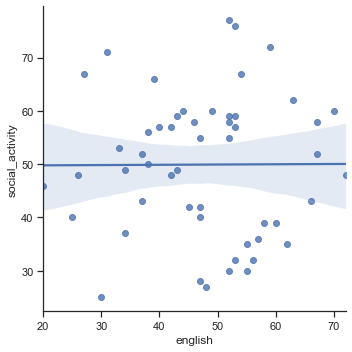

In [21]:
sns.lmplot(x="english", y="social_activity", data=backdoor2_df, ci=95)

In [22]:
reg = "social_activity ~ english"
model = sm.ols(formula=reg, data=backdoor2_df)

# 回帰分析を実行する
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        social_activity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                  0.001084
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.974
Time:                        17:16:04   Log-Likelihood:                -207.47
No. Observations:                  52   AIC:                             418.9
Df Residuals:                      50   BIC:                             422.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.6829      7.526      6.601      0.000      34.566      64.800
english        0.0051      0.153      0.033      0.974      -0.303       0.313
==============================================================================
Omnibus:                        1.943   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.379   Jarque-Bera (JB):                1.254
Skew:                          -0.011   Prob(JB):                        0.534
Kurtosis:                       2.239   Cond. No.                         200.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### 重回帰 with バックドア

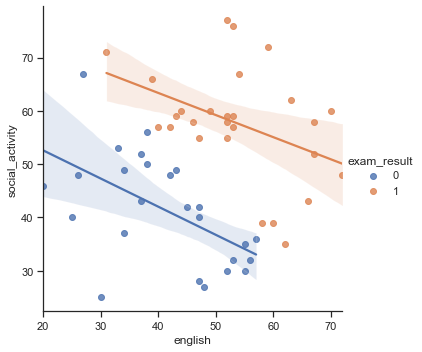

In [23]:
sns.lmplot(x="english", y="social_activity", hue="exam_result",
           data=backdoor2_df, ci=95)

In [24]:
reg = "social_activity ~ english + exam_result"
model = sm.ols(formula=reg, data=backdoor2_df)

# 回帰分析を実行する
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        social_activity   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     26.99
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           1.25e-08
Time:                        17:16:04   Log-Likelihood:                -188.16
No. Observations:                  52   AIC:                             382.3
Df Residuals:                      49   BIC:                             388.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      60.8455      5.460     11.144      0.000      49.873      71.818
english        -0.4719      0.125     -3.772      0.000      -0.723      -0.220
exam_result    22.1664      3.017      7.347      0.000      16.103      28.230
==============================================================================
Omnibus:                        0.211   Durbin-Watson:                   2.359
Prob(Omnibus):                  0.900   Jarque-Bera (JB):                0.002
Skew:                          -0.001   Prob(JB):                        0.999
Kurtosis:                       3.026   Cond. No.                         211.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Q8. CMの効果検証（1）：素朴な分析

[岩波データサイエンス Vol.3のサポートページ](https://raw.githubusercontent.com/iwanami-datascience/vol3/master/kato%26hoshino/q_data_x.csv)にて公開されているファイルは，あるスマートフォン向けゲームGを開発・運営している企業がゲームGの利用を高めるべくテレビCMを打ち，その後の利用者の行動および利用者属性を記録したものである．このCSVファイルは行がモニタリングした利用者に対応し，各列には以下の情報が含まれている（詳細は[コチラ](https://drive.google.com/file/d/0Bw-J75fYQ33NV19UM3JFLTVJX2s/view)）：

* ``cm_dummy``：CMを見たかどうかのフラグ（介入フラグ）
* ``gamedummy``：ゲームをプレイしたかのフラグ
* ``area_kanto``：利用者の居住地が関東エリアかを示すフラグ
* ``area_keihan``：利用者の居住地が京浜エリアかを示すフラグ（area_keihinのタイポと思われる）
* ``area_tokai``：利用者の居住地が東海エリアかを示すフラグ
* ``area_keihanshin``：利用者の居住地が京阪神エリアかを示すフラグ
* ``age``：年齢
* ``sex``：性別
* ``marry_dummy``：既婚か否かを示すフラグ
* ``job_dummyX``：職業
* ``fam_str_dummyX``：家族構成
* ``inc``：年収
* ``pmoney``：1ヶ月あたりのお小遣い
* ``child_dummy``：子どもの有無
* ``T``：利用者がT層（13-19歳）か否か
* ``F1``：利用者がF1層（20-34歳の女性）か否か
* ``F2``：利用者がF2層（35-49歳の女性）か否か
* ``F3``：利用者がF3層（50歳以上の女性）か否か
* ``M1``：利用者がM1層（20-34歳の男性）か否か
* ``M2``：利用者がM2層（35-49歳の男性）か否か
* ``M3``：利用者がM3層（50歳以上の男性）か否か
* ``TVwatch_day``：1日あたりのテレビ視聴時間（秒）
* ``gamesecond``：ゲームGのプレイ時間（秒）
* ``gamecount``：ゲームGのプレイ回数

上記データをダウンロードし，そのデータを``pandas``データフレームに格納せよ．また，CM接触の有無ごとに
* ゲームGのプレイ時間
* ゲームGのプレイ回数

の平均および標準偏差を計算せよ．また，CM接触の有無による「ゲームプレイ回数」「ゲームプレイ時間」の平均の差に関してt検定を行い，CMの効果に関して考察を行え．

In [25]:
cm_df = pd.read_csv("../data/causal-analysis/q_data_x.csv")
#cm_df = pd.read_csv("https://raw.githubusercontent.com/iwanami-datascience/vol3/master/kato%26hoshino/q_data_x.csv")

# 集計
cm_df.groupby(['cm_dummy']).agg({
    'gamedummy': [np.mean, np.std],    
    'gamecount': [np.mean, np.std],
    'gamesecond': [np.mean, np.std]
})

gamedummy            gamecount              gamesecond              
              mean       std       mean        std         mean           std
cm_dummy                                                                     
0         0.073087  0.260302  10.048497  55.266546  3107.706455  19496.771900
1         0.075290  0.263890   8.563948  53.331477  2478.065878  15564.015196

##### プレイの有無

In [26]:
t, p, dof = ttest_ind(cm_df[cm_df.cm_dummy == 1].gamedummy, 
                      cm_df[cm_df.cm_dummy == 0].gamedummy)

print("p-value on gamesecond = ", p)

p-value on gamesecond =  0.678607379511988


##### プレイ回数

In [27]:
t, p, dof = ttest_ind(cm_df[cm_df.cm_dummy == 1].gamecount, 
                      cm_df[cm_df.cm_dummy == 0].gamecount)

print("p-value on gamecount = ", p)

p-value on gamecount =  0.1794551497544827


##### プレイ時間

In [28]:
t, p, dof = ttest_ind(cm_df[cm_df.cm_dummy == 1].gamesecond, 
                      cm_df[cm_df.cm_dummy == 0].gamesecond)

print("p-value on gamesecond = ", p)

p-value on gamesecond =  0.08439975968019144


### Q9. CMの効果検証（2）：セレクションバイアス
Q8のような方法でCMの効果検証を行う場合，CMに接触した利用者群とCMに接触しなかった利用者群の特徴が類似していなければ，プレイ回数やプレイ時間の平均の差を調べても，CMの効果によって差が生じたのか，群の性質（利用者の特徴）の違いによって差が生じたのかが分からない．

CMに接触した利用者と接触しなかった利用者の群において，下記項目の分布を比較し，2つの群の性質に違いがあるかないかを考察せよ．
* 年齢
* 性別
* 年収
* 子どもの有無
* 配偶者の有無
* 居住地
* 1日あたりのテレビ視聴時間

##### 平均と標準偏差

In [29]:
cm_df.groupby(['cm_dummy']).agg({
    'age': [np.mean, np.std],
    'sex': [np.mean, np.std],
    'marry_dummy': [np.mean, np.std],
    'child_dummy': [np.mean, np.std],    
    'area_kanto': [np.mean, np.std],
    'area_keihan': [np.mean, np.std],
    'area_tokai': [np.mean, np.std],
    'area_keihanshin': [np.mean, np.std],
    'inc': [np.mean, np.std],
    'TVwatch_day': [np.mean, np.std]
}).T

cm_dummy                        0             1
age             mean    40.187158     41.767133
                std     10.636461     10.148360
sex             mean     0.671107      0.596766
                std      0.469851      0.490606
marry_dummy     mean     0.630464      0.670367
                std      0.482720      0.470137
child_dummy     mean     0.421960      0.424469
                std      0.493914      0.494322
area_kanto      mean     0.063012      0.131033
                std      0.243006      0.337477
area_keihan     mean     0.509051      0.701255
                std      0.499961      0.457763
area_tokai      mean     0.124488      0.093147
                std      0.330165      0.290673
area_keihanshin mean     0.303449      0.074566
                std      0.459787      0.262721
inc             mean   369.245902    341.697153
                std    264.486960    270.695337
TVwatch_day     mean  5714.982257  11461.881259
                std   5690.371292   8851.091199

##### ヒストグラム

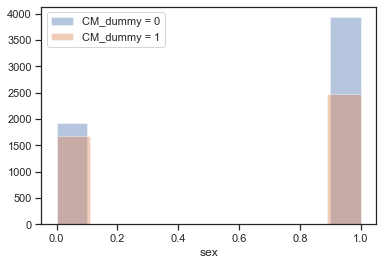

In [30]:
# 性別の分布
sns.distplot(cm_df[cm_df.cm_dummy == 0].sex, kde=False)
fig = sns.distplot(cm_df[cm_df.cm_dummy == 1].sex, kde=False)
fig.legend(['CM_dummy = 0', 'CM_dummy = 1'])

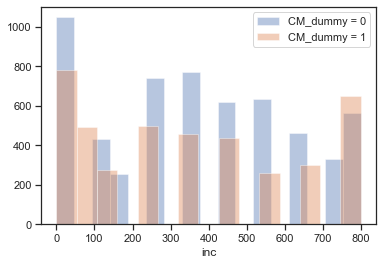

In [31]:
# 年収の分布
sns.distplot(cm_df[cm_df.cm_dummy == 0].inc, kde=False)
fig = sns.distplot(cm_df[cm_df.cm_dummy == 1].inc, kde=False)
fig.legend(['CM_dummy = 0', 'CM_dummy = 1'])

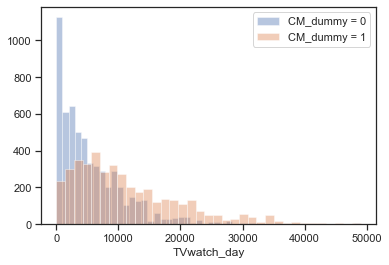

In [32]:
# テレビ視聴時間の分布
sns.distplot(cm_df[cm_df.cm_dummy == 0].TVwatch_day, kde=False)
fig = sns.distplot(cm_df[cm_df.cm_dummy == 1].TVwatch_day, kde=False)
fig.legend(['CM_dummy = 0', 'CM_dummy = 1'])

### Q10. CMの効果検証（3）：交絡因子を考慮した回帰分析
比較している群の潜在的な特徴が異なることによって，介入（例：CM）効果の検証プロセスに発生するバイアスは**セレクションバイアス**と呼ばれる．セレクションバイアスの影響の除去には，様々な方法が提案されている．

**[傾向スコア（propensity score）](https://www.randpy.tokyo/entry/propensity_score_1)** は，セレクションバイアスの影響を軽減しながら効果検証を行うために，介入群と非介入群で同じような性質を持つ集団をまとめるための情報を提供する．傾向スコアを用いて，CMがゲームプレイ時間に与える効果について再度考察せよ．

**ヒント**：傾向スコアを用いた効果検証方法には，「傾向スコアマッチング」「IPW（逆確率重み付け）」「ダブルロバスト」などがある．今回の課題では，傾向スコアさえ用いれば，どのような方法を用いてもよい．

#### 解説

「傾向スコアを共変量に組み込んだ回帰分析（回帰モデルの補正項に傾向スコアを組み込む方法）」はあまり行わない．回帰分析を用いる方法は，設定した回帰モデルが誤っていた場合に問題が生じる．モデル依存性が低い他の方法が推奨されている．

In [33]:
from sklearn.linear_model import LogisticRegression

cm_df = pd.read_csv("../data/causal-analysis/q_data_x.csv")

# cm_df.columnsから介入変数と目的変数を除いたもの
target_features = ['age', 'sex', 'inc',
                   'area_kanto', 'area_keihan', 'area_tokai', 'area_keihanshin',
                   'job_dummy1', 'job_dummy2', 'job_dummy3', 'job_dummy4', 'job_dummy5',
                   'job_dummy6', 'job_dummy7', 'job_dummy8',
                   'fam_str_dummy1', 'fam_str_dummy2', 'fam_str_dummy3', 'fam_str_dummy4', 'fam_str_dummy5',
                   'T', 'M1', 'M2', 'M3', 'F1', 'F2', 'F3',
                   'child_dummy', 'marry_dummy', 'pmoney', 'TVwatch_day']

X = cm_df[target_features].values
z = cm_df.cm_dummy.values
y = cm_df['gamesecond']

# 傾向スコアの計算
lr = LogisticRegression(max_iter=10000, penalty='none')
ps = lr.fit(X, z).predict_proba(X)[:, 1]

# IPWE
e_y1 = np.sum(z * y / ps) / np.sum(z / ps)
e_y0 = np.sum((1 - z) * y / (1 - ps)) / np.sum((1 - z) / (1 - ps))

ATE = e_y1 - e_y0
print(e_y1, e_y0)
print("Average Treatment Effect (ATE) = ", ATE)

3118.7017118124127 2590.5842467856246
Average Treatment Effect (ATE) =  528.1174650267881


#### CausalML

In [34]:
from causalml.inference.meta import BaseXLearner
from xgboost import XGBRegressor

cm_df = pd.read_csv("../data/causal-analysis/q_data_x.csv")

The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.


##### ATE (Average Treatment Effect)

In [35]:
target_features = ['age', 'sex', 'inc',
                   'area_kanto', 'area_keihan', 'area_tokai', 'area_keihanshin',
                   'job_dummy1', 'job_dummy2', 'job_dummy3', 'job_dummy4', 'job_dummy5',
                   'job_dummy6', 'job_dummy7', 'job_dummy8',
                   'fam_str_dummy1', 'fam_str_dummy2', 'fam_str_dummy3', 'fam_str_dummy4', 'fam_str_dummy5',
                   'T', 'M1', 'M2', 'M3', 'F1', 'F2', 'F3',
                   'child_dummy', 'marry_dummy', 'pmoney', 'TVwatch_day']

x_learner = BaseXLearner(learner=XGBRegressor())

# 学習・効果量算出
X = cm_df[target_features]
Z = cm_df['cm_dummy']
y = cm_df['gamesecond']

# 着実にやるなら
x_learner.fit(X=X, treatment=Z, y=y)
CATE = x_learner.predict(X=X)
ATE = np.mean(CATE.flatten())
ATE

# # 一発でやるなら
# ATE, lower_b, upper_b = x_learner.estimate_ate(X, Z, y)
# ATE

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the

831.4469293897786

##### 効果に寄与する要因

In [36]:
x_learner.get_importance(X=X, # 共変量
                         tau=CATE, # ITE
                         normalize=True, 
                         method='auto', features=list(X.columns))

{1: TVwatch_day        0.404019
 fam_str_dummy5     0.222602
 inc                0.079061
 pmoney             0.056596
 age                0.048559
 child_dummy        0.032344
 job_dummy2         0.022936
 job_dummy7         0.021457
 fam_str_dummy3     0.017999
 M2                 0.016371
 M1                 0.011139
 fam_str_dummy1     0.010876
 marry_dummy        0.009631
 area_tokai         0.009354
 area_keihan        0.008970
 sex                0.006447
 area_kanto         0.005554
 job_dummy1         0.003531
 job_dummy5         0.002661
 fam_str_dummy2     0.002283
 area_keihanshin    0.002241
 fam_str_dummy4     0.001260
 M3                 0.000879
 job_dummy3         0.000688
 job_dummy6         0.000671
 job_dummy4         0.000634
 job_dummy8         0.000384
 F1                 0.000336
 F2                 0.000294
 F3                 0.000221
 T                  0.000000
 dtype: float64}

---
### 参考資料
傾向スコアを用いた因果推論
* [傾向スコアを用いた因果推論入門~理論編~](https://pira-nino.hatenablog.com/entry/casual_inference)
* [傾向スコアを用いた因果推論入門~実装編~](https://pira-nino.hatenablog.com/entry/causal_inference_implement)
* [傾向スコア：その概念とRによる実装（林岳彦さん）](https://www.slideshare.net/takehikoihayashi/propensity-score-analysis-seminar-japanese) ：図が分かりやすい

岩波データサイエンスVol.3の分析例
* [因果推論の王道テクニック”傾向スコア”を丁寧に考えてみる~RとPythonにて~](https://www.medi-08-data-06.work/entry/ps_score)
* [岩波データサイエンスvol.3のCM接触の因果効果を他の方法で推定してみた(1)](https://yuranhiko.hatenablog.com/entry/causal_inference_iwanami3-1)
* [岩波データサイエンスvol.3のCM接触の因果効果を他の方法で推定してみた(2)](https://yuranhiko.hatenablog.com/entry/causal_inference_iwanami3-2)
* [岩波データサイエンスvol.3のCM接触の因果効果を他の方法で推定してみた(3)](https://yuranhiko.hatenablog.com/entry/causal_inference_iwanami3-3)

バックドア基準の解説
* [バックドア基準の入門とその使用例](https://www.slideshare.net/takehikoihayashi/ss-73059140)
* [計量経済学応用 6. 重回帰分析 (1) @高知工科大学（->課題で用いたデータを作る際に参考にさせていただいた）](https://yukiyanai.github.io/jp/classes/econometrics2/contents/slides/applied-econometrics-slides-06.pdf)
* [【点と矢印で因果関係を考える】因果関係がないときにデータから関連が生じるパターンとその対策まとめ：因果ダイアグラム（DAG）によるバイアスの視覚的整理 - Unboundedly](https://www.krsk-phs.com/entry/structural_bias)

Do
* [確率と因果を革命的に架橋する：Judea Pearlのdo演算子](http://takehiko-i-hayashi.hatenablog.com/entry/20111222/1324487579)

Pythonで因果推論を行うためのライブラリ
* [CausalML](https://github.com/uber/causalml) by Uber
    * Uplift modelingが売り．他，Meta-learner
* [dowhy](https://github.com/microsoft/dowhy) by Microsoft
   * Pearl流の因果推論を行うライブラリ
   * 強力なメソッドを提供してくれているというは，基本的なことを厳密にやるための機能を提供している
* [EconML](https://github.com/microsoft/econml) by Microsoft
    * Causal Forest，Meta-learnerなど
    * TensorFlow 2.xでは動かない？ 1.x系が求められる？